In [17]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X, y= fetch_openml(data_id= 41082, as_frame= False, return_X_y= True, parser= "liac-arff")
X= MinMaxScaler().fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify= y, random_state= 0, train_size= 1_000, test_size= 100)
rng= np.random.RandomState(0)
noise= rng.normal(scale= 0.25, size= X_test.shape)
X_test_noisy= X_test + noise
noise= rng.normal(scale= 0.25, size= X_train.shape)
X_train_noisy= X_train + noise

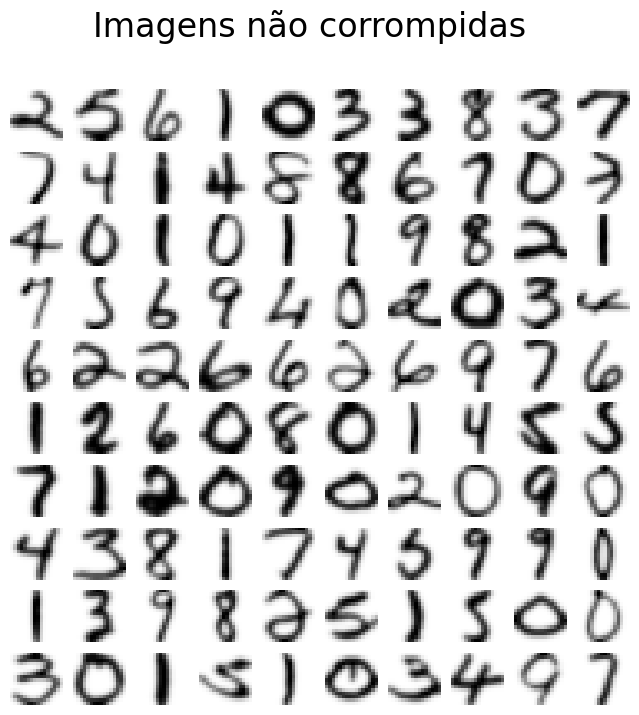

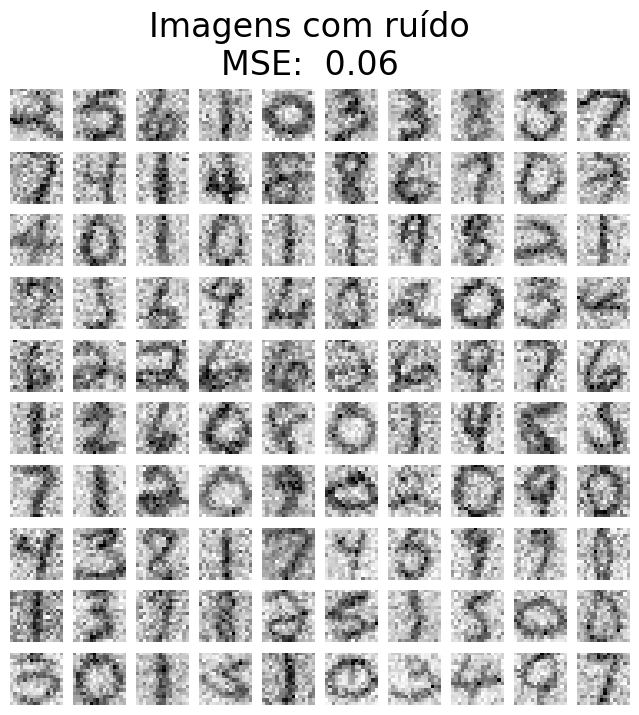

In [19]:
import matplotlib.pyplot as plt
def plot_digits(X, title):
    fig, axs= plt.subplots(nrows= 10, ncols= 10, figsize= (8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap= "Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize= 24)
    
plot_digits(X_test, "Imagens não corrompidas")
plot_digits(X_test_noisy, f"Imagens com ruído\nMSE: {np.mean((X_test - X_test_noisy) ** 2): .2f}")

In [20]:
from sklearn.decomposition import KernelPCA
kernel_pca= KernelPCA(n_components= 400, kernel= "rbf", gamma= 1e-3, fit_inverse_transform= True, alpha= 5e-3)
_= kernel_pca.fit(X_train_noisy)

X_reconstructed_kernel_pca= kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

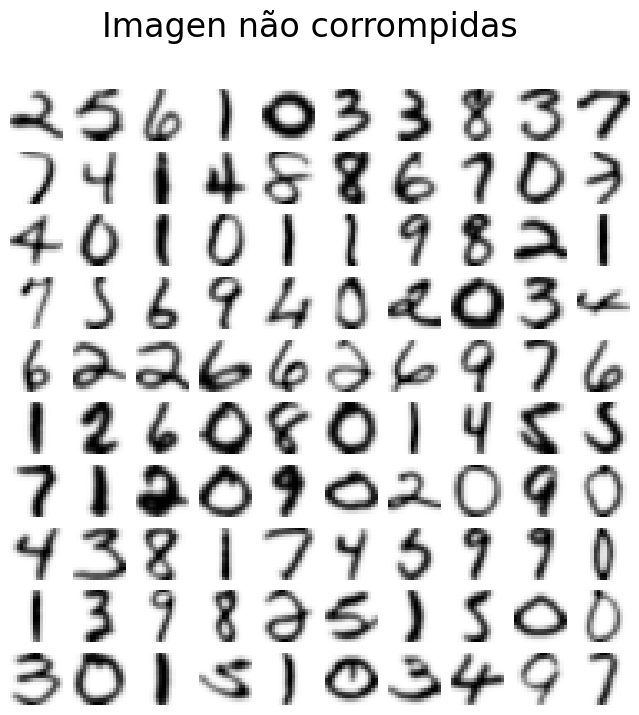

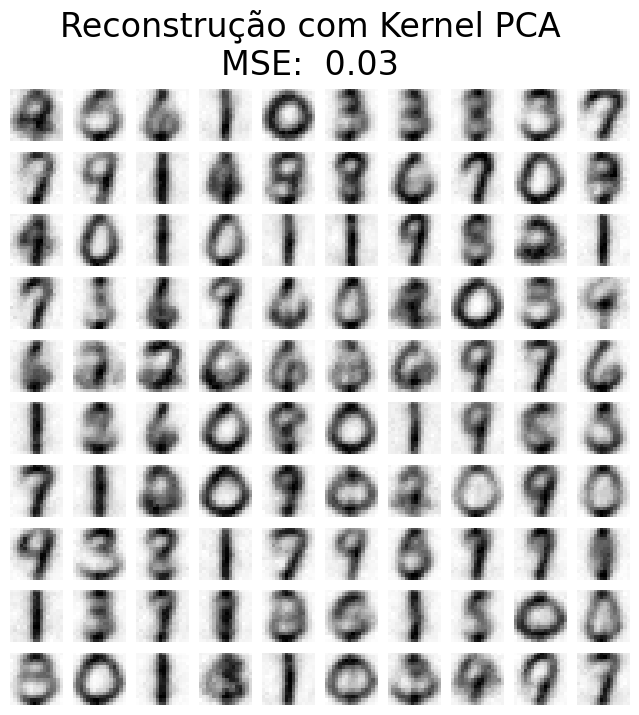

In [21]:
plot_digits(X_test, "Imagen não corrompidas")
plot_digits(X_reconstructed_kernel_pca, "Reconstrução com Kernel PCA\n"
f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2): .2f}",)